# $$Introduction$$

### Heart Disease data analysis & Machine Learning model implementation

## Objective
I develop a Machine Learning Model which is predict a person is affected or not by **"HEART DISEASES"** based on previous heart disease data.

###  Data Information
- Number of rows 303
- Number of columns 14

 - Age(int)
    - The maximum Value is 77 
    - The minimum Value is 29 
    - The number of unique Values is 41 
    
  - Sex(int)
    - The maximum Value is 1 
    - The minimum Value is 0 
    - The number of unique Values is 2 
    - The nunique Values is [0 1]
       - Female
       - male
    
  - Cp(int) = chest pain type
     - The maximum Value is 3 
     - The minimum Value is 0 
     - The number of unique Values is 4 
     - The nunique Values is [0 1 2 3]
        - typical angina
        - atypical angina
        - non-anginal pain
        - asymptomatic
     
  - trestbps(int) = resting blood pressure (in mm Hg on admission to the hospital)
    - The maximum Value is 200 
    - The minimum Value is 94 
    - The number of unique Values is 49 
    
  - Chol(int) = serum cholestoral in mg/dl
    - The maximum Value is 564 
    - The minimum Value is 126 
    - The number of unique Values is 152 
    
  - Fbs(int) = fasting blood sugar > 120 mg/dl
    - The maximum Value is 1 
    - The minimum Value is 0 
    - The number of unique Values is 2 
    - The nunique Values is [0 1]
      - False
      - True
    
  - Restecg(int) = restecg: resting electrocardiographic results
     - The maximum Value is 2 
     - The minimum Value is 0 
     - The number of unique Values is 3 
     - The nunique Values is [0 1 2]
       - normal 
       - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05  mV      
       - showing probable or definite left ventricular hypertrophy by Estes' criteria]
    
  - thalach(int) = maximum heart rate achieved
    - The maximum Value is 202 
    - The minimum Value is 71 
    - The number of unique Values is 91
    
  - exang(int) = exercise induced angina
    - The maximum Value is 1 
    - The minimum Value is 0 
    - The number of unique Values is 2 
    - The nunique Values is [0 1] 
       - No
       - Yes
    
  - oldpeak(float) = ST depression induced by exercise relative to rest
    - The maximum Value is 6.2 
    - The minimum Value is 0.0 
    - The number of unique Values is 40
    
  - slope(int) = the slope of the peak exercise ST segment
    - The maximum Value is 2 
    - The minimum Value is 0 
    - The number of unique Values is 3 
    - The nunique Values is [0 1 2]
       - upsloping
       - flat
       - downsloping
     
  - Ca(int) = number of major vessels (0-3) colored by flourosopy
    - The maximum Value is 4 
    - The minimum Value is 0 
    - The number of unique Values is 5 
    - The nunique Values is [0 2 1 3 4] 
    
  - Thal(int)
    - The maximum Value is 3 
    - The minimum Value is 0 
    - The number of unique Values is 4 
    - The nunique Values is [0 1 2 3]
       - normal
       - fixed
       - defect
       - reversable
    
  - Target(int)
    - The maximum Value is 1 
    - The minimum Value is 0 
    - The number of unique Values is 2 
    - The nunique Values is [0 1]
       - Not disease
       - disease

## $$Exploratory$$ $$Data$$ $$Analysis$$

## Necessery Liberary Import

In [1]:
import pandas as pd  # Load data
import numpy as np # Scientific Computing
import matplotlib.pyplot as plt  # Data Visualization
import seaborn as sns  # Data Visualization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report
import missingno as msno  # showing null values by bar graph
import warnings  # Ignore Warnings
warnings.filterwarnings("ignore")
sns.set()   # Set Graphs Background

## Data Load

In [2]:
data = pd.read_csv('../input/heartdata1/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Information
- There are 303 rows
- There are 14 columns
- No Null Values Present
- Only oldpeak is float data type otherwise all is int data type

In [3]:
# shape showing how many data rows & columns have
data.shape

(303, 14)

In [4]:
# info() showing rows & columns number column name data type Non-null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Mising Value Checking
- I use five function for mising value checking
   - insull()
      - If any value is null return True
      - Otherewise return False
      
   - isnull().any()
      - If any columns have null value return True
      - Otherewise return False
      
   - isnull().sum()
      - If any columns have null value return how many null values have
      - If no null value present return 0
      
   - missingno()
      - Showing values by bar graph
      
   - Heatmap()
      - Showing values by graph

In [5]:
# isnull() check null value
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# any() check null values by columns
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

- All columns return False
- The dataset no null value present

In [7]:
# innull().sum() show total null values 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- All columns return 0
- The dataset no null value present

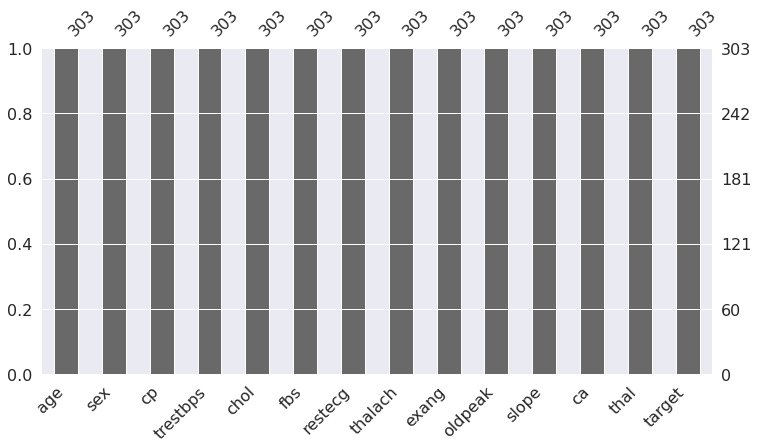

In [8]:
# missingno() showing null values by bar graph
msno.bar(data, figsize=(12,6))
plt.show()

- Total rows have 303 & every bar is full
- There have no null values present

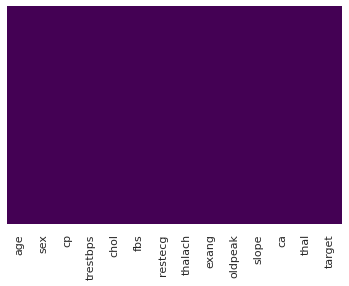

In [9]:
# heatmap() showing null values
sns.heatmap(data.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.show()

- Graph is full clean
- There have no null values

## Statistical Information

In [10]:
# describe() statistical information
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- Values should be closer each other.
- There is no incompatible values

## Histogram 

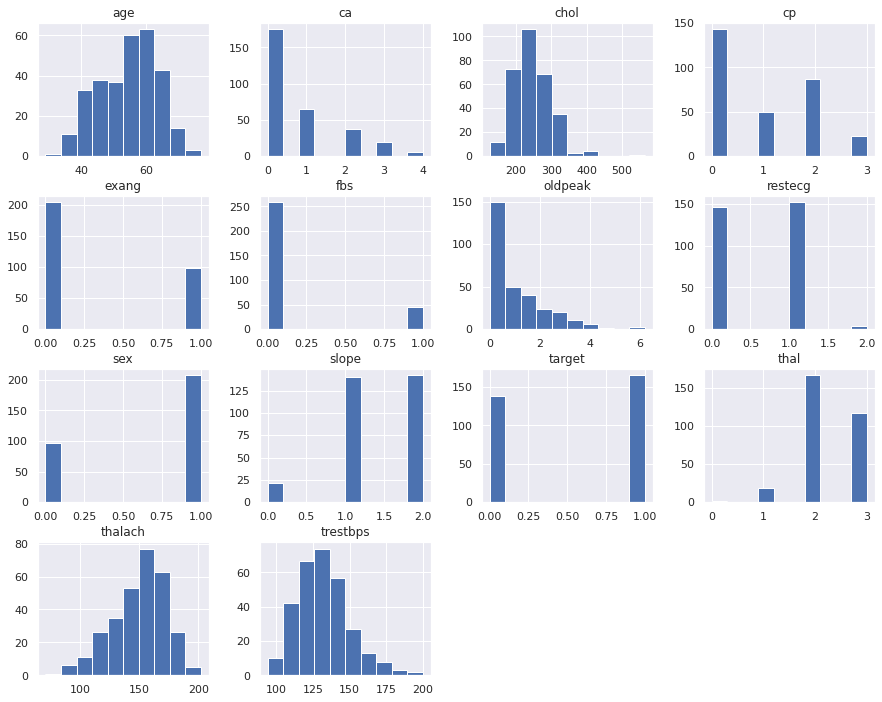

In [11]:
# hist() histogram 
data.hist(figsize = (15,12))
plt.show()

## Sex Unique Value Counts & Plot

1    207
0     96
Name: sex, dtype: int64


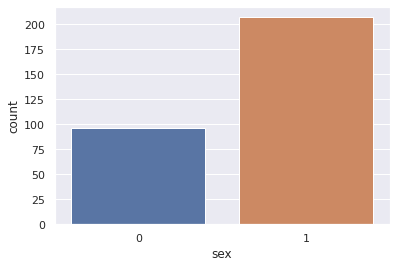

In [12]:
# value_counts() total unique value count
print(data.sex.value_counts())
sns.countplot(x='sex', data=data)
plt.show()

- There are 207 male
- There are 96 female

## Ca Unique Value Counts & Plot

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


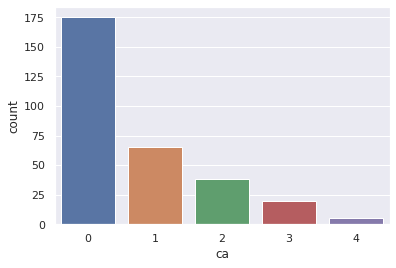

In [13]:
# value_counts() total unique value count
print(data.ca.value_counts())
sns.countplot(x='ca', data=data)
plt.show()

## Fbs Unique Value Counts & Plot

0    258
1     45
Name: fbs, dtype: int64


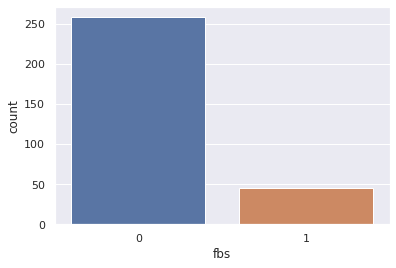

In [14]:
# value_counts() total unique value count
print(data.fbs.value_counts())
sns.countplot(x='fbs', data=data)
plt.show()

- There are 258 False values
- There are 45 True values

## Cp Unique Value Counts & Plot

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


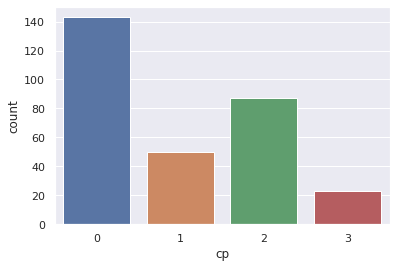

In [15]:
# value_counts() total unique value count
print(data.cp.value_counts())
sns.countplot(x='cp', data=data)
plt.show()

- typical angina 143
- atypical angina 50
- non-anginal pain 87
- asymptomatic 23

## Exang Unique Value Counts & Plot

0    204
1     99
Name: exang, dtype: int64


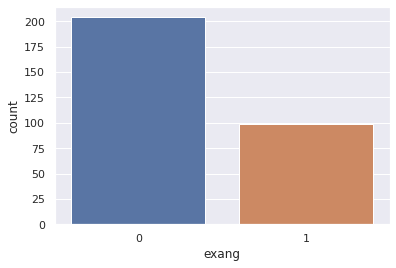

In [16]:
# value_counts() total unique value count
print(data.exang.value_counts())
sns.countplot(x='exang', data=data)
plt.show()

- Exang No 204
- Exang Yes 99

## Restecg Unique Value Counts & Plot

1    152
0    147
2      4
Name: restecg, dtype: int64


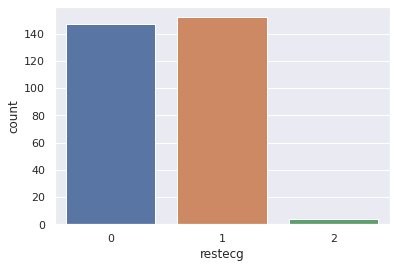

In [17]:
# value_counts() total unique value count
print(data.restecg.value_counts())
sns.countplot(x='restecg', data=data)
plt.show()

- normal 147
- having ST-T wave abnormality 152
- left ventricular hypertrophy by Estes' criteria 4

## Slope Unique Value Counts & Plot

2    142
1    140
0     21
Name: slope, dtype: int64


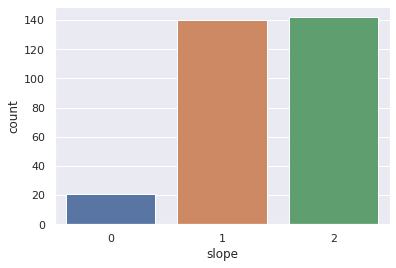

In [18]:
# value_counts() total unique value count
print(data.slope.value_counts())
sns.countplot(x='slope', data=data)
plt.show()

- upsloping 21
- flat 140
- downsloping 142

## Thal Unique Value Counts & Plot

2    166
3    117
1     18
0      2
Name: thal, dtype: int64


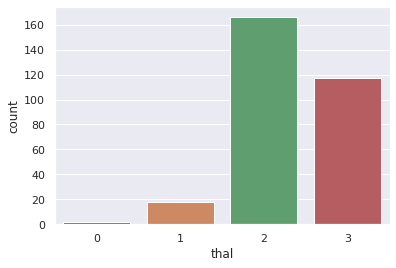

In [19]:
# value_counts() total unique value count
print(data.thal.value_counts())
sns.countplot(x='thal', data=data)
plt.show()

- normal 2
- fixed 18
- defect 166
- reversable 117

## Target Unique Value Counts & Plot

1    165
0    138
Name: target, dtype: int64


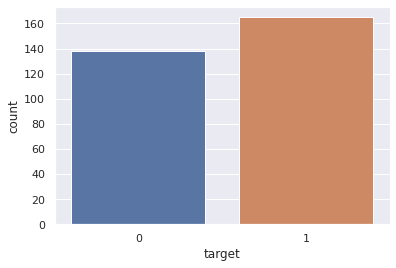

In [20]:
# value_counts() total unique value count
print(data.target.value_counts())
sns.countplot(x='target', data=data)
plt.show()

- Yes 165
- No 138

## Age VS Chol Scatter Plot

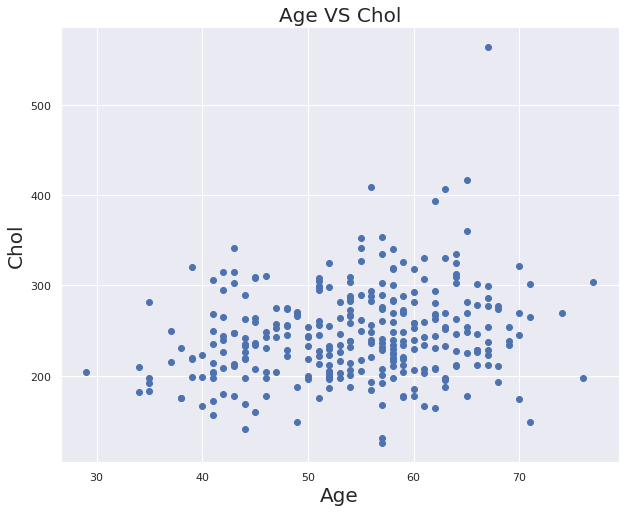

In [21]:
# scatter() relation between two columns
plt.figure(figsize=(10,8))
plt.scatter(data['age'],data['chol'])
plt.title('Age VS Chol', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Chol', fontsize=20)
plt.show()

- There are some value outlier

## Age VS Trestbps Scatter Plot

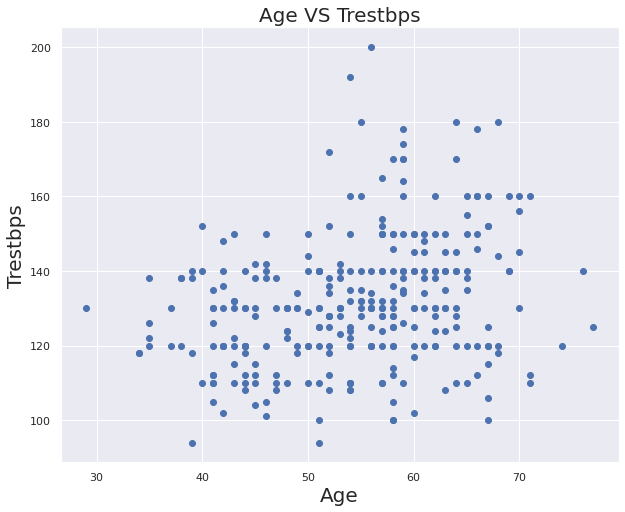

In [22]:
# scatter() relation between two columns
plt.figure(figsize=(10,8))
plt.scatter(data['age'],data['trestbps'])
plt.title('Age VS Trestbps', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Trestbps', fontsize=20)
plt.show()

- There are some value outlier

## Age VS Thalach Scatter Plot

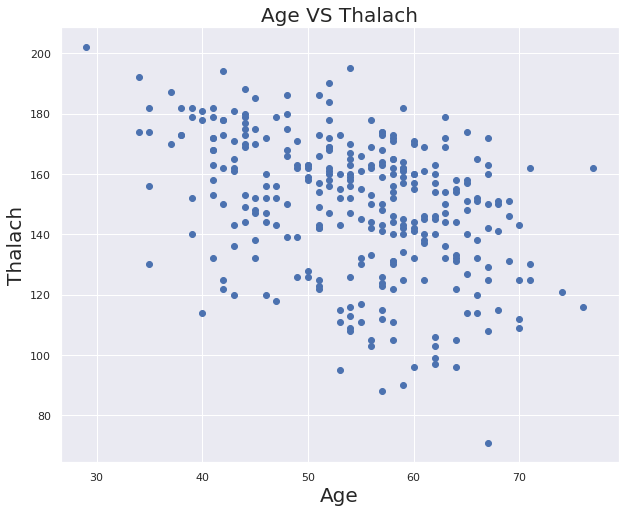

In [23]:
# scatter() relation between two columns
plt.figure(figsize=(10,8))
plt.scatter(data['age'],data['thalach'])
plt.title('Age VS Thalach', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Thalach', fontsize=20)
plt.show()

- There are some value outlier

## Trestbps VS Chol Scatter Plot

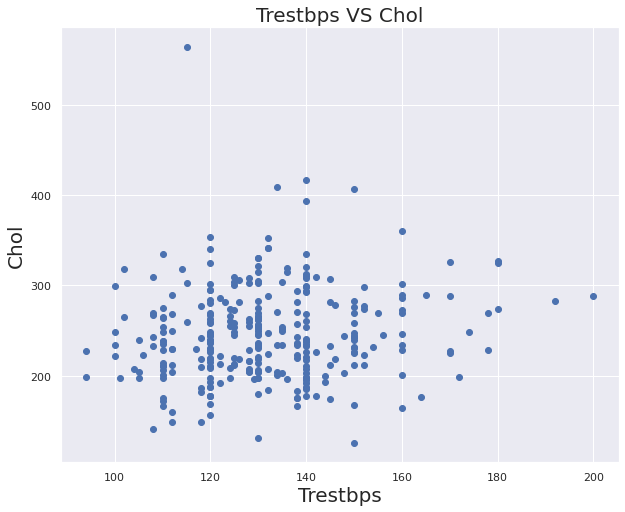

In [24]:
# scatter() relation between two columns
plt.figure(figsize=(10,8))
plt.scatter(data['trestbps'],data['chol'])
plt.title('Trestbps VS Chol', fontsize=20)
plt.xlabel('Trestbps', fontsize=20)
plt.ylabel('Chol', fontsize=20)
plt.show()

- There are some value outlier

## Trestbps VS Thalach Scatter Plot

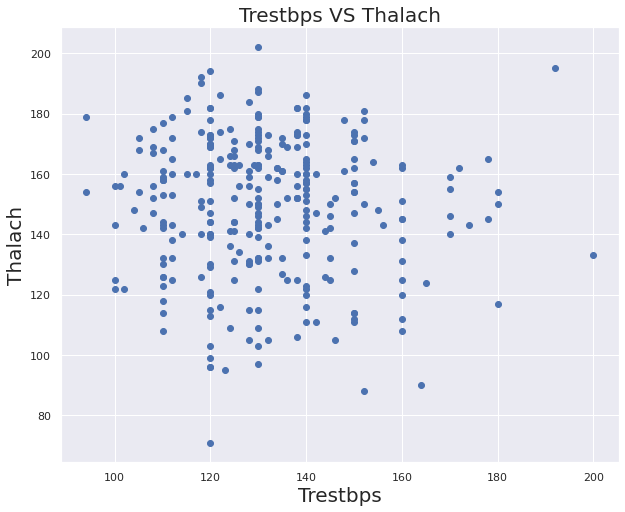

In [25]:
# scatter() relation between two columns
plt.figure(figsize=(10,8))
plt.scatter(data['trestbps'],data['thalach'])
plt.title('Trestbps VS Thalach', fontsize=20)
plt.xlabel('Trestbps', fontsize=20)
plt.ylabel('Thalach', fontsize=20)
plt.show()

- There are some value outlier

## Chol VS Thalach Scatter Plot

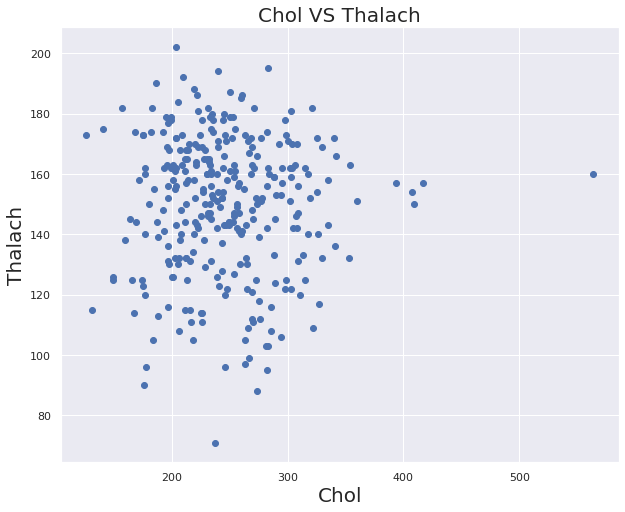

In [26]:
# scatter() relation between two columns
plt.figure(figsize=(10,8))
plt.scatter(data['chol'],data['thalach'])
plt.title('Chol VS Thalach', fontsize=20)
plt.xlabel('Chol', fontsize=20)
plt.ylabel('Thalach', fontsize=20)
plt.show()

- There are some value outlier

## Box Plot

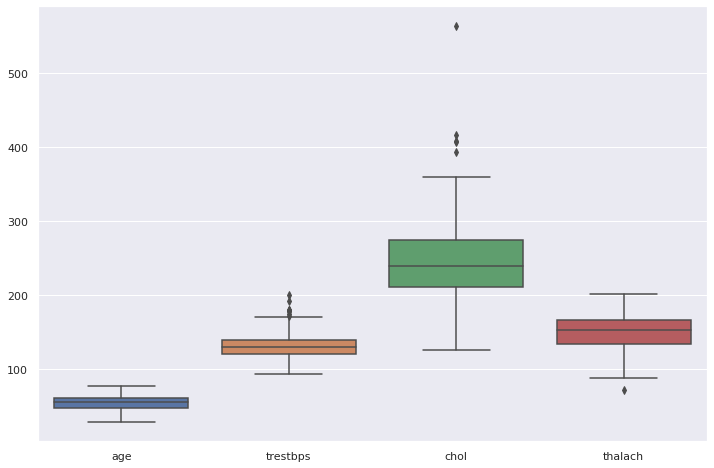

In [27]:
# boxplot() showing outlier
box = data[['age','trestbps','chol','thalach']]
plt.figure(figsize=(12,8))
sns.boxplot(data=box)
plt.show()

- Now data has outlier
- Trestbps , Chol ,Thalach Some outlier present

### Outlier Remove

In [28]:
data_iqr = box
Q1 = data_iqr.quantile(0.25)
Q3 = data_iqr.quantile(0.75)
iqr = Q3 - Q1

data_iqr_clean = data_iqr[~((data_iqr < (Q1 - 1.5*iqr)) | (data_iqr > (Q3 + 1.5*iqr))).any(axis=1)]

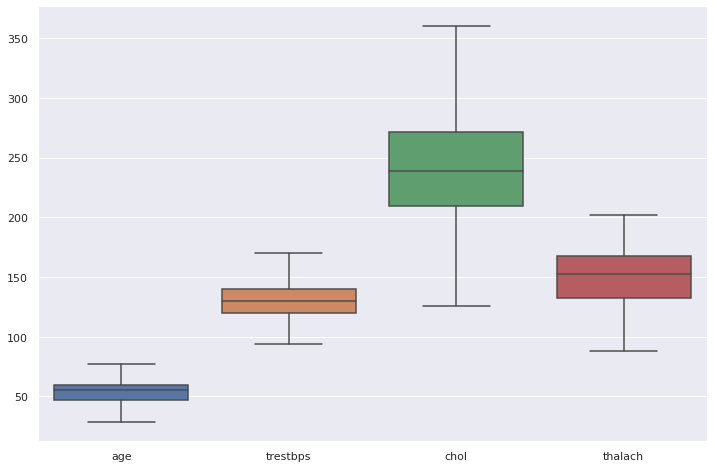

In [29]:
# boxplot() showing outlier
box = data_iqr_clean[['age','trestbps','chol','thalach']]
plt.figure(figsize=(12,8))
sns.boxplot(data=box)
plt.show()

- Now data has no outlier

## Distibution Plot

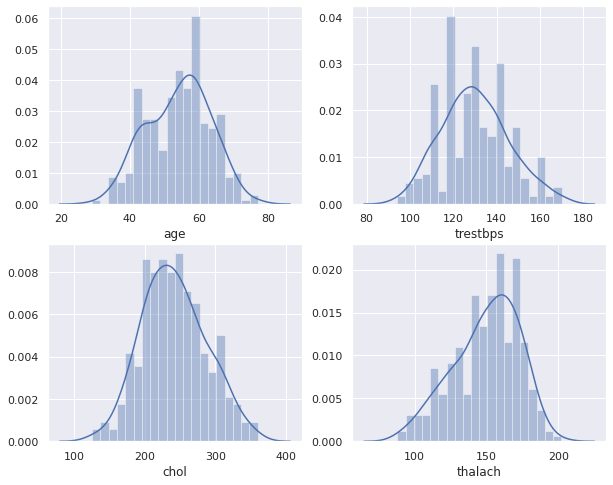

In [30]:
# distplot() same as histogram
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.distplot(data_iqr_clean.age, bins = 20, ax=ax[0,0]) 
sns.distplot(data_iqr_clean.trestbps, bins = 20, ax=ax[0,1]) 
sns.distplot(data_iqr_clean.chol, bins = 20, ax=ax[1,0])
sns.distplot(data_iqr_clean.thalach, bins = 20, ax=ax[1,1])
plt.show()

## Heatmap

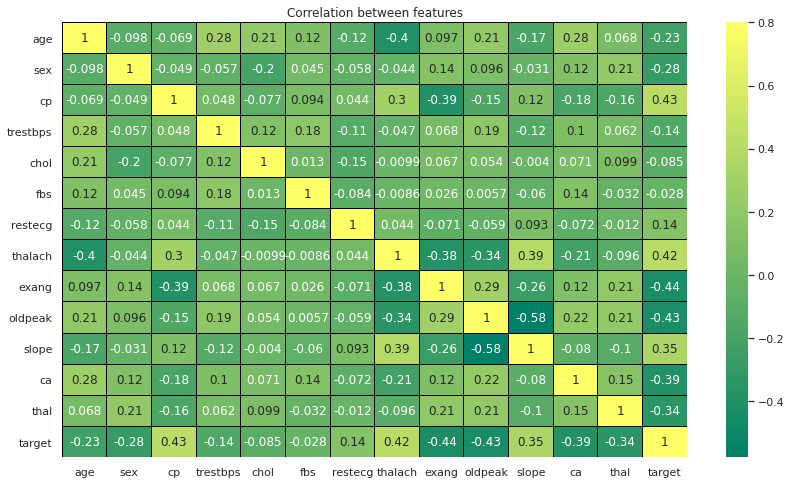

In [31]:
# corr() relation with data
corr=data.corr()

plt.figure(figsize=(14,8))

sns.heatmap(corr, vmax=.8, linewidths=0.01,annot=True,cmap='summer',linecolor="black")
plt.title('Correlation between features')
plt.show()

## Machine Learning Model Implementation

In [32]:
x = data.iloc[:,0:-1].values # All rows & columns present except Target column
y = data.iloc[:,-1].values # Only target column present

## Data Split
- train_test_split() use for data divided
- test size use for ratio split
- random_state is random seed

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=4)

## After split data shape

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## Support vector machine object create
- fit() tarin the model

In [35]:
svm = SVC(kernel='rbf',random_state=0)
svm.fit(x_train,y_train)

SVC(random_state=0)

In [36]:
svm.score(x_test,y_test)

0.6721311475409836

- svm score 67.21%

## Use StandardScaler
- StandardScaler() use for value transform
- fit_transform() use for train data transform
- transform() use for test data transform

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
svm = SVC(kernel='rbf',random_state=0,probability=True) #probability for predict_proba
svm.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [39]:
svm.score(x_test,y_test)

0.8688524590163934

- After StandardScaler the score is 86.88%

## Hyperparameter Tuning

In [40]:
param_grid = {'C':[1,10,100,200],
              'kernel':['rbf','poly','linear','sigmoid'],
              'degree':[1,2,4,6],
              'gamma':[0.01,0.1,0.5,1]}

grid=GridSearchCV(SVC(), param_grid=param_grid, cv=4)
grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print("Accuracy: {}".format(grid.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(grid.best_params_))

Accuracy: 0.9016393442622951
Tuned Model Parameters: {'C': 1, 'degree': 1, 'gamma': 0.5, 'kernel': 'poly'}


In [41]:
svm = SVC(C=1,kernel='poly',degree=1,gamma=0.5,probability=True)
svm.fit(x_train,y_train)

SVC(C=1, degree=1, gamma=0.5, kernel='poly', probability=True)

In [42]:
svm.score(x_test,y_test)

0.9016393442622951

- After Hyperparameter Tuning use accuracy is 90.16%

## Confusion Matrix

In [43]:
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_pred,y_test)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[21  2]
 [ 4 34]]


- False Positive 21
- False Negative 2
- True Negative 4
- True Positive 34

## Confusion Matrix Heatmap

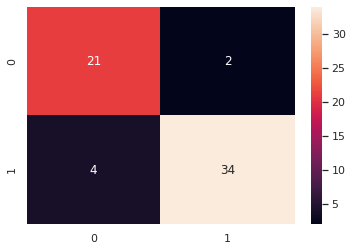

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

## Classification Report

In [45]:
cr = classification_report(y_pred,y_test)
print('Classification Report\n',cr)

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.94      0.89      0.92        38

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



## ROC Curve with Support Vector Machine

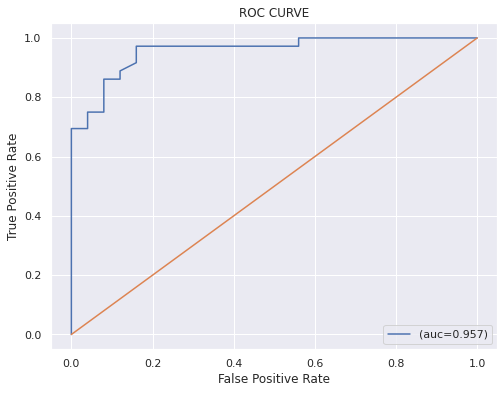

In [46]:
y_prob = svm.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_prob)
Auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,linestyle='-',label='(auc=%0.3f)' %Auc)
plt.plot([0,1],[0,1])
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Model complexity

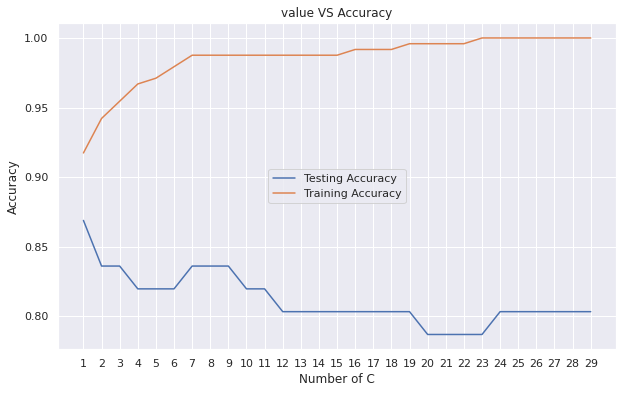

Best accuracy is 0.8688524590163934 with C = 1


In [47]:
num = np.arange(1, 30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(num):
    svm = SVC(C=k)
    svm.fit(x_train,y_train)
    train_accuracy.append(svm.score(x_train, y_train))
    test_accuracy.append(svm.score(x_test, y_test))

# Plot
plt.figure(figsize=(10,6))
plt.plot(num, test_accuracy, label = 'Testing Accuracy')
plt.plot(num, train_accuracy, label = 'Training Accuracy')
plt.legend(loc=10)
plt.title('value VS Accuracy')
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.xticks(num)
plt.show()
print("Best accuracy is {} with C = {}".format(np.max(test_accuracy),
                                               1+test_accuracy.index(np.max(test_accuracy))))

## Get Dummies Use

In [48]:
data1 = data.copy() # copy data
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Thal column get dummies

In [49]:
data1_thal = pd.get_dummies(data['thal'],prefix='thal')
data1_thal.head()

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


## Slope column get dummies

In [50]:
data1_slope = pd.get_dummies(data['slope'],prefix='slope')
data1_slope.head()

,slope_0,slope_1,slope_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


## Restecg column get dummies

In [51]:
data1_restecg = pd.get_dummies(data['restecg'],prefix='restecg')
data1_restecg.head()

,restecg_0,restecg_1,restecg_2
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


## Cp column get dummies

In [52]:
data1_cp = pd.get_dummies(data['cp'],prefix='cp')
data1_cp.head()

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


## Ca column get dummies

In [53]:
data1_ca = pd.get_dummies(data['ca'],prefix='ca')
data1_ca.head()

,ca_0,ca_1,ca_2,ca_3,ca_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


## Get dummies data concat 

In [54]:
data2 = pd.concat([data1_cp,data1_restecg,data1_slope,data1_ca,data1_thal],axis='columns')

In [55]:
data2.head()

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


## Original & dummies data concat

In [56]:
data3 = pd.concat([data1,data2],axis='columns')
data3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1,0,0,0,0,0,0,1,0


## Drop main dummies columns with target column

In [57]:
data3 = data3.drop(['cp','restecg','slope','thal','ca','target'], axis=1)
data3.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,1,0,0,0,0,0,0,1,0


## concat target column with data3

In [58]:
data3 = pd.concat([data3,data.target],axis=1)
data3.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,0,0,0,1,0,0,1
1,37,1,130,250,0,187,0,3.5,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,0,0,1,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,1,0,0,0,0,0,0,1,0,1
4,57,0,120,354,0,163,1,0.6,1,0,...,1,0,0,0,0,0,0,1,0,1


## Data3 separate into input columns & output column

In [59]:
x = data3.iloc[:,:-1].values # All rows & columns present except Target column
y = data3.iloc[:,-1].values # Only target column present

## separate data split 80:20

In [60]:
xx_train,xx_test,yy_train,yy_test = train_test_split(x,y, test_size=0.2, random_state=4)

## Apply SVC

In [61]:
svm = SVC(C=1,kernel='poly',degree=1,gamma=0.5,probability=True)
svm.fit(xx_train,yy_train)

SVC(C=1, degree=1, gamma=0.5, kernel='poly', probability=True)

## DecisionTreeClassifier

In [62]:
param_grid = {'ccp_alpha':[0.0,0.1,0.2,0.3,0.4,1],
              'criterion':['gini','entropy'],
              'max_depth':[5,10,50,100,200],
              'max_leaf_nodes':[5,10,50,100,200],
              'random_state':[2,5,10,20,42]}

grid=GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=4)
grid.fit(xx_train,yy_train)

print("Tuned Model Parameters: {}".format(grid.best_params_))

Tuned Model Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'random_state': 2}


In [63]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=10,
                            ccp_alpha=0.0,random_state=2)
dtc.fit(xx_train,yy_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, random_state=2)

## LogisticRegression

In [64]:
param_grid = {'C':[1.0,2.0,5.0,10.0,20.0],
              'penalty':['l1','l2','none','elasticnet'],
              'max_iter':[50,100,200,300,500],
              'multi_class':['auto','ovr','multinomial']}

grid=GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=4)
grid.fit(xx_train,yy_train)

print("Tuned Model Parameters: {}".format(grid.best_params_))

Tuned Model Parameters: {'C': 5.0, 'max_iter': 50, 'multi_class': 'multinomial', 'penalty': 'l2'}


In [65]:
lg = LogisticRegression(C=5.0,max_iter=50,multi_class='multinomial',penalty='l2')
lg.fit(xx_train,yy_train)

LogisticRegression(C=5.0, max_iter=50, multi_class='multinomial')

## RandomForestClassifier

In [66]:
param_grid = {'n_estimators':[50, 100,150,200,300],
              'criterion':['gini','entropy'],
              'max_depth':[5,10,50,100,200]}

grid=GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=4)
grid.fit(xx_train,yy_train)

print("Tuned Model Parameters: {}".format(grid.best_params_))

Tuned Model Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 300}


In [67]:
rfc = RandomForestClassifier(criterion='gini',max_depth=5,n_estimators=50)
rfc.fit(xx_train,yy_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [68]:
print("Support Vector Machine Accuracy: {}".format(svm.score(xx_test, yy_test)))
print("DecisionTreeClassifier Accuracy: {}".format(dtc.score(xx_test, yy_test)))
print("LogisticRegression Accuracy: {}".format(lg.score(xx_test, yy_test)))
print("RandomForestClassifier Accuracy: {}".format(rfc.score(xx_test, yy_test)))

Support Vector Machine Accuracy: 0.9180327868852459
DecisionTreeClassifier Accuracy: 0.8032786885245902
LogisticRegression Accuracy: 0.8852459016393442
RandomForestClassifier Accuracy: 0.9016393442622951


- Support Vector Machine Accuracy: 91.80%
- DecisionTreeClassifier Accuracy: 80.32%
- LogisticRegression Accuracy: 88.52%
- RandomForestClassifier Accuracy: 93.44%

- So we can decide that LogisticRegression is the best model for this dataset & its accuracy 93.44%